<a href="https://colab.research.google.com/github/yshan9/deep_learning/blob/master/music_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib-venn

In [3]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [4]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorboard, wheel, h5py, gast, opt-einsum, six, keras-preprocessing, numpy, protobuf, absl-py, termcolor, scipy, astunparse, google-pasta, wrapt, grpcio, tensorflow-estimator
Required-by: fancyimpute
     |████████████████████████████████| 320.4MB 47kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 35.0MB 128kB/s 
     |████████████████████████████████| 890kB 46.3MB/s 
     |████████████████████████████████| 245kB 41.0MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=3bcd5cb6dea70af1c70439e218f06a780007102b7e7f272c03dceafca5c624

In [5]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 144798 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 6.3MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-cp36-none-any.whl size=31632 sha256=f62c705d77a7ccd83e6f0d331d4b270d73b6df0257b7e88f0c66f4b765d56290
  Stored in directory: /root/.cache/pip/wheels/3b/5c/fa/92ee330d259e8fa5bedbd53f67040710fe81cfa463b8711d26
Successfully built libarchive


In [6]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [7]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 144854 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [8]:
import pretty_midi

ModuleNotFoundError: ignored

In [9]:
# For Python2.6 compatibility
from __future__ import print_function

import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display

ModuleNotFoundError: ignored

In [1]:
import music21

In [16]:
import glob

In [2]:
import numpy

In [21]:
pip install vocab

NameError: ignored

In [17]:
from music21 import converter, instrument, note, chord
notes = []
for file in glob.glob("midi_songs/*.mid"):
    midi = converter.parse(file)
    notes_to_parse = None
    parts = instrument.partitionByInstrument(midi)
    if parts: # file has instrument parts
        notes_to_parse = parts.parts[0].recurse()
    else: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))

In [25]:
sequence_length = 100
# get all pitch names
pitchnames = sorted(set(item for item in notes))
# create a dictionary to map pitches to integers
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
network_input = []
network_output = []
# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]
    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])
n_patterns = len(network_input)
# reshape the input into a format compatible with LSTM layers
network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))


In [27]:
 pip install musicgen

     |████████████████████████████████| 1.9MB 3.9MB/s 


In [29]:
# normalize input
network_input = network_input / float(n_vocab)
network_output = np_utils.to_categorical(network_output)

NameError: ignored

In [ ]:
model = Sequential()
    model.add(LSTM(
        256,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(256))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
filepath = "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"    
checkpoint = ModelCheckpoint(
    filepath, monitor='loss', 
    verbose=0,        
    save_best_only=True,        
    mode='min'
)    
callbacks_list = [checkpoint]     
model.fit(network_input, network_output, epochs=200, batch_size=64, callbacks=callbacks_list)

In [3]:
midi_pretty_format = pretty_midi.PrettyMIDI('song.mid')

NameError: ignored

MUSIC CLASSIFICATION

In [5]:
# music 3

from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/'

# Get the absolute path of the deep utilities folder


Mounted at /content/drive


In [6]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
# %cd $abspath_util_deep

# Import the deep utitilities
# %run pmlm_utilities_deep.ipynb

In [4]:
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

In [7]:
import os 

directory = os.path.dirname(abspath_curr + 'Muisc-genre-classification-main/data2.csv/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'music_data2'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + '/Muisc-genre-classification-main/data2.csv',
                       as_supervised=True,
                       with_info=True)

In [17]:
import pandas as pd

In [16]:
data=pd.read_csv('/content/drive/My Drive/Muisc-genre-classification-main/data2.csv')

In [18]:
data.head(300)


,File-name,chroma_shft,rmse,spec_cent,spec_bw,rolloff,zcr,MFCC--1,MFCC--2,MFCC--3,MFCC--4,MFCC--5,MFCC--6,MFCC--7,MFCC--8,MFCC--9,MFCC--10,MFCC--11,MFCC--12,MFCC--13,MFCC--14,MFCC--15,MFCC--16,MFCC--17,MFCC--18,MFCC--19,MFCC--20,Lable
0,rock.00008.wav,0.408748,0.260914,1717.312205,1842.500561,3362.721333,0.084981,-14.910254,138.420124,-41.889428,22.070244,-18.660637,31.994634,-20.366154,15.689840,-17.350268,14.861217,-8.898566,12.247996,-5.819694,9.968250,-3.163116,1.976028,-6.923686,3.121398,-2.987225,-6.677925,Rock
1,rock.00001.wav,0.365525,0.180543,1529.345464,1845.423388,3271.663550,0.054982,-111.136301,134.159482,-24.647956,41.544623,-3.057124,28.483072,-10.571676,14.921677,-14.384826,8.840186,-4.542453,9.939369,-4.665001,3.626334,-5.541119,3.364801,-4.942521,-1.472867,0.100885,-5.332559,Rock
2,rock.00005.wav,0.376780,0.203785,1542.205910,1591.924670,2870.199311,0.077020,-62.348380,153.770773,-55.112845,28.016488,-6.844085,17.476861,-22.603344,18.141622,-12.583872,4.493736,-8.383072,7.204514,-2.524919,4.834071,-6.272217,-0.725831,-2.277204,-5.243365,-5.218907,-6.279709,Rock
3,rock.00006.wav,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,46.457300,-17.135585,10.505286,-14.554871,16.543108,-12.317913,3.689543,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,Rock
4,rock.00003.wav,0.380017,0.151226,1421.568971,1902.883344,3042.739934,0.043097,-156.602967,130.686506,-1.457021,36.220929,0.388322,31.983893,-0.618636,20.134576,-11.338957,13.837787,-3.768497,11.535877,-3.217205,5.065080,-1.784673,3.535590,-2.447573,-0.717627,-1.413266,0.637624,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,pop.00095.wav,0.365712,0.303920,3046.148817,3306.480614,7384.647013,0.106394,-36.622723,73.082171,39.133504,20.341821,12.504606,2.150093,11.739913,-2.424380,6.652705,3.179703,-5.391148,-3.155387,-5.774647,-7.681010,-7.607766,-6.850216,-6.112240,-1.564934,2.133322,-1.562207,Pop
296,pop.00098.wav,0.399895,0.213083,3634.050584,3134.249724,7534.687772,0.183106,-26.902570,46.710707,8.701760,8.600640,6.090376,12.428580,6.957394,2.503607,1.160028,7.259748,-3.128959,1.253731,3.836709,4.690396,1.714553,-0.980313,-1.300124,-2.687255,-1.269861,-2.485296,Pop
297,pop.00096.wav,0.339957,0.251243,3126.533643,3162.743738,6931.233088,0.105346,-59.099176,60.976773,27.745595,23.873961,12.298408,7.371333,12.329105,7.163457,13.432547,2.496932,-1.956466,-2.403196,-4.513487,3.468001,2.026163,3.719552,2.489373,1.276359,3.131913,1.647612,Pop
298,pop.00091.wav,0.424473,0.265422,3696.225140,3246.695112,7871.035738,0.166830,-8.384624,41.998152,8.295316,17.976979,14.045181,7.344525,5.721310,-1.902804,4.603536,2.075449,-1.065354,-0.656881,-2.429781,-1.472319,-3.762977,-1.658407,-2.379022,0.052522,-0.989721,-2.601742,Pop


In [19]:
data.shape

(999, 28)

In [21]:
from sklearn import preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
y=data.iloc[:,-1].values
le=LabelEncoder()
y=le.fit_transform(y)

In [26]:
print(y[500])

4


In [27]:
data.tail(100)

,File-name,chroma_shft,rmse,spec_cent,spec_bw,rolloff,zcr,MFCC--1,MFCC--2,MFCC--3,MFCC--4,MFCC--5,MFCC--6,MFCC--7,MFCC--8,MFCC--9,MFCC--10,MFCC--11,MFCC--12,MFCC--13,MFCC--14,MFCC--15,MFCC--16,MFCC--17,MFCC--18,MFCC--19,MFCC--20,Lable
899,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,-6.376457,18.618875,-13.697911,15.344630,-12.285266,10.980491,-8.324323,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,Blues
900,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,-32.489270,10.864512,-23.357929,0.503117,-11.805831,1.206804,-13.083820,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,Blues
901,blues.00007.wav,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,39.988027,5.289679,10.924427,-20.561889,8.513764,-11.356908,-3.469077,-8.414554,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613,Blues
902,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,-13.987036,25.754761,-13.649586,11.629271,-11.780589,9.706442,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,Blues
903,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,2.916038,21.523725,-8.554703,23.358672,-10.103616,11.903744,-5.560387,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,blues.00098.wav,0.442972,0.125422,2310.280604,2206.710936,4829.320798,0.128426,-90.677485,100.093133,-23.916267,52.581125,-20.916392,31.494155,-11.203329,20.085382,-10.909220,17.556229,-14.092525,12.988067,-11.415392,2.906069,-12.012914,4.822585,-11.156674,1.159210,-3.913956,3.250427,Blues
995,blues.00097.wav,0.375158,0.198282,1236.574280,1602.309124,2604.150920,0.044626,-148.639173,145.746311,-9.363639,48.453770,10.557437,18.006432,-2.626048,16.955489,-11.512661,8.724417,-8.164551,3.230693,-0.667060,-0.727791,-6.821160,-3.942547,-15.739370,-5.604688,-5.802770,-0.048729,Blues
996,blues.00095.wav,0.369973,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553972,139.977099,-1.269146,39.323654,-6.351806,19.769089,-11.213042,27.246107,-16.532666,7.031403,-1.197161,1.611758,-6.628307,4.952240,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,Blues
997,blues.00094.wav,0.376687,0.141018,1239.337228,1659.466470,2517.618110,0.050908,-206.278431,126.627468,10.585205,43.223168,12.501488,19.425002,0.357382,12.738808,-4.572330,4.050817,-4.413953,3.659409,-1.448481,-1.695150,-7.157464,1.171114,-6.221975,0.600703,-1.605095,-0.528774,Blues


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
x=data.iloc[:,1:-1].values
sc=StandardScaler()

x=sc.fit_transform(x)

print(x)
print(x.shape)

[[ 0.36718559  1.97962866 -0.67767556 ...  0.67519091 -0.17548743
  -1.45493329]
 [-0.16222343  0.75590734 -0.9402859  ... -0.51241416  0.6467968
  -1.10435347]
 [-0.02436844  1.10977802 -0.92231843 ... -1.48707773 -0.76972713
  -1.35116472]
 ...
 [-0.10774666  0.85647708 -1.13720964 ... -1.67412392 -0.12089117
  -1.40700574]
 [-0.02550897  0.15409888 -1.34545949 ...  0.0235979   0.19253815
   0.14743171]
 [-1.44769992 -1.21118362 -1.49494558 ...  0.27280724  0.85716693
  -1.78911837]]
(999, 26)


In [33]:
import sklearn.model_selection as model_selection

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.125,random_state=1)

'''x_train= np.reshape(x_train, ((-1, 599, 20, 1)))
x_test= np.reshape(x_test, ((-1, 250, 20, 1)))
x_validation= np.reshape(x_validation, ((-1, 150, 20, 1)))'''

'x_train= np.reshape(x_train, ((-1, 599, 20, 1)))\nx_test= np.reshape(x_test, ((-1, 250, 20, 1)))\nx_validation= np.reshape(x_validation, ((-1, 150, 20, 1)))'

In [36]:
print(x_train.shape[0])
print(x_validation.shape)
print(x_test.shape)


##input_siz=(x_train.shape[1],x_train.shape[2],1)

699
(100, 26)
(200, 26)


In [37]:
#BUILDING THE CNN

model=keras.Sequential()


#layer 1
##model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_siz))
#model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
#model.add(keras.layers.BatchNormalization())



#layer 2
'''model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())



#layer 3
model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

#flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(10, activation='softmax'))'''
##model.add(keras.layers.Flatten(input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(10, activation='softmax'))

In [38]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [39]:
#train the CNN

history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size=256, epochs=200)

Epoch 1/200
3/3 [==============================] - 0s 114ms/step - loss: 2.9303 - accuracy: 0.1230 - val_loss: 2.7644 - val_accuracy: 0.2400
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 2.7779 - accuracy: 0.2189 - val_loss: 2.6478 - val_accuracy: 0.2800
Epoch 3/200
3/3 [==============================] - 0s 13ms/step - loss: 2.6473 - accuracy: 0.2918 - val_loss: 2.5545 - val_accuracy: 0.2700
Epoch 4/200
3/3 [==============================] - 0s 13ms/step - loss: 2.5818 - accuracy: 0.3133 - val_loss: 2.4878 - val_accuracy: 0.3300
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 2.4823 - accuracy: 0.3491 - val_loss: 2.4192 - val_accuracy: 0.3200
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 2.4020 - accuracy: 0.3548 - val_loss: 2.3649 - val_accuracy: 0.3200
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 2.3473 - accuracy: 0.3920 - val_loss: 2.3177 - val_accuracy: 0.3100
Epoch 8/200
3/3 [==

In [40]:
test_error,test_accuracy=model.evaluate(x_test,y_test)
print(test_accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 1.6526 - accuracy: 0.7100
0.7099999785423279


In [41]:
print(test_accuracy)

0.7099999785423279


In [42]:
results = model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.6526 - accuracy: 0.7100


In [43]:
print(results)

[1.652583122253418, 0.7099999785423279]


In [45]:
import matplotlib.pyplot as plt

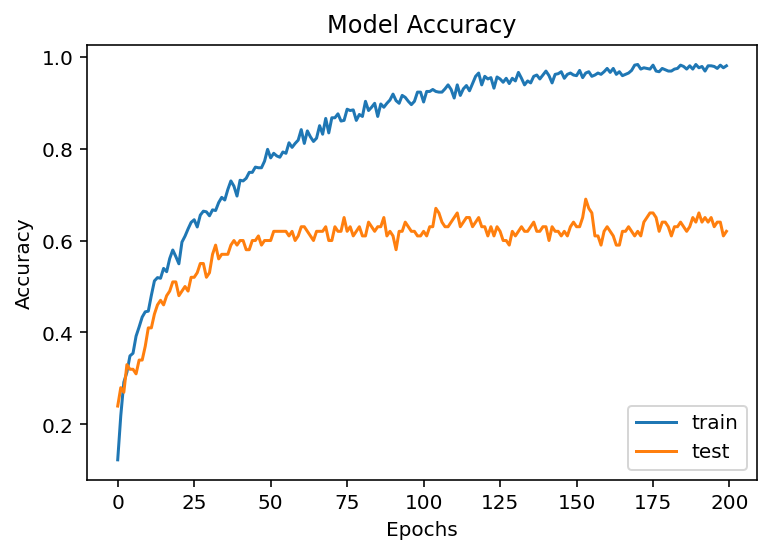

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","test"],loc="lower right")
plt.show()

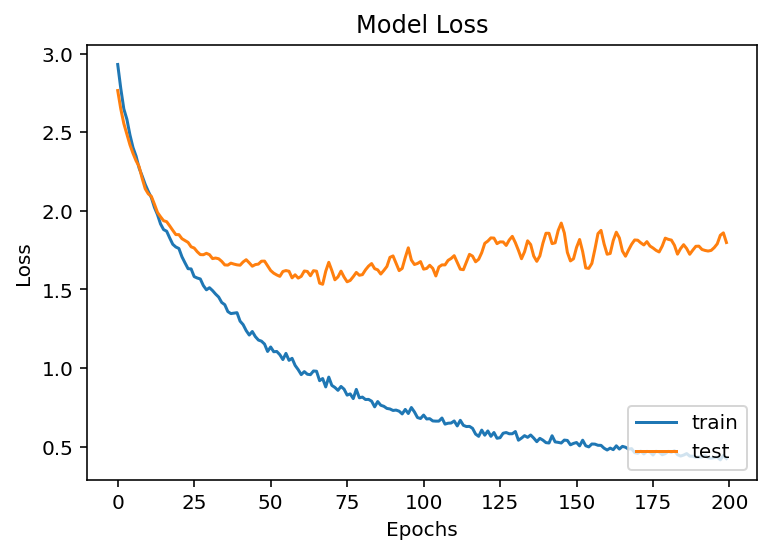

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train","test"],loc="lower right")
plt.show()

In [50]:
# save model

model.save('/content/drive/My Drive/Muisc-genre-classification-main/results')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Muisc-genre-classification-main/results/assets


In [ ]:
import pickle
with open('F:\\Sem-5\\SGP\\source\\my_model3.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [52]:
model=keras.models.load_model('/content/drive/My Drive/Muisc-genre-classification-main/results')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [53]:
stfl_results = model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.6526 - accuracy: 0.1350


In [55]:
pip install librosa

In [57]:
import librosa

(1, 26)
[[-1.2296222  -0.81895141 -1.40257078 -1.27145623 -1.33102626 -1.23643636
  -1.40013888  0.29433194  0.83235927  0.89693711  1.57699287 -0.59222746
   1.39887731 -0.74196649  0.84750118 -0.69258874  1.49798075 -1.15860232
   1.03910911  0.18145797  1.48800264  0.46799158 -0.12270292 -0.0032813
   2.19680345  1.12287598]]
The genre for this song is Blues


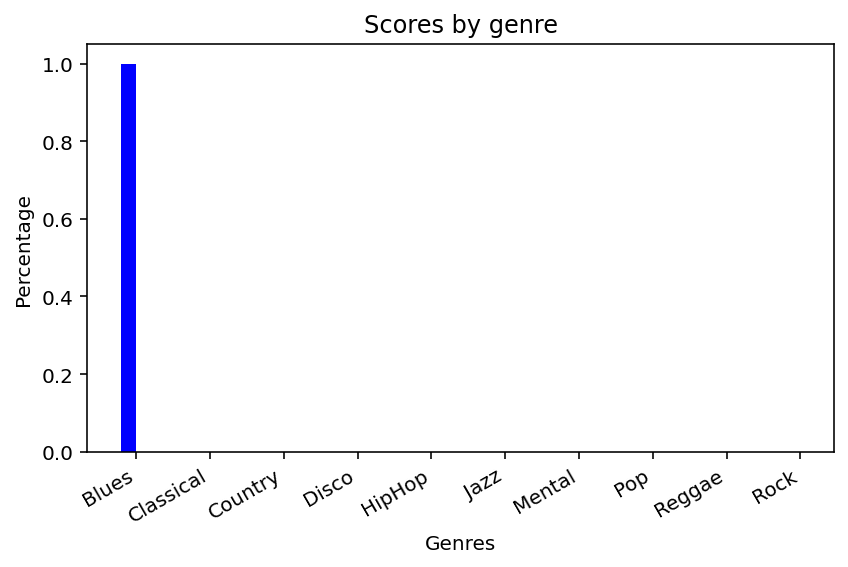

In [58]:
from sklearn.preprocessing import StandardScaler
q=StandardScaler()
dhruv=q.fit(x)

new_song='/content/drive/My Drive/Muisc-genre-classification-main/blues.00026.wav'
new_signal,sr=librosa.load(new_song,duration=60)
f1 = librosa.feature.mfcc(new_signal,sr=sr)
f2 = librosa.feature.rms(y=new_signal)
f3 = librosa.feature.spectral_centroid(y=new_signal, sr=sr)
f4 = librosa.feature.spectral_bandwidth(y=new_signal, sr=sr)
f5 = librosa.feature.spectral_rolloff(y=new_signal, sr=sr)
f6 = librosa.feature.zero_crossing_rate(new_signal)
f7 = librosa.feature.chroma_stft(y=new_signal, sr=sr)

##print(mfccs)
##print(mfccs.shape)

##librosa.display.specshow(mfccs, sr=sr,x_axis='time')
##plt.xlabel("Time") 
##plt.ylabel("MFCC")
##plt.colorbar()
##plt.show()
new=[]
new.append(np.mean(f7))
new.append(np.mean(f2))
new.append(np.mean(f3))
new.append(np.mean(f4))
new.append(np.mean(f5))
new.append(np.mean(f6))



for e in f1:
  new.append(np.mean(e))

##print(to)
final_new=[new]
##print(arr)
#print(final_new)
#abcd=q.fit_transform(final_new)
final_new=np.array(final_new)
final_pree= model.predict(sc.transform(final_new))
##print(predictions.shape)
#print(abcd)
#print(abc)
print(final_new.shape)
print(sc.transform(final_new))
r=np.argmax(final_pree)
#print(final_pre)
#print(r)
if r==0:
  print("The genre for this song is Blues")
elif r==1:
  print("The genere for this song is Classical")
elif r==2:
  print("The genere for this song is Country")
elif r==3:
  print("The genere for this song is Disco")
elif r==4:
  print("The genere for this song is HipHop")
elif r==5:
  print("The genere for this song is Jazz")
elif r==6:
  print("The genere for this song is Mental")
elif r==7:
  print("The genere for this song is Pop")
elif r==8:
  print("The genere for this song is Reggae")
elif r==9:
  print("The genere for this song is Rock")
tags = ['Blues', 'Classical', 'Country', 'Disco', 'HipHop', 'Jazz', 'Mental', 'Pop', 'Reggae', 'Rock']
tags = np.array(tags)

colors = ['b','g','c','r','m','k','y','#ff1122','#5511ff','#44ff22']
fig, ax = plt.subplots()
index = np.arange(tags.shape[0])
opacity = 1
bar_width = 0.2
mean=final_pree.flatten() 
#for g in rini_array1.flatten() ange(0, tags.shape[0]):
plt.bar(x=index, height=mean, width=bar_width, alpha=opacity, color=colors)
plt.rcParams["figure.figsize"] = (10, 6)

plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.title('Scores by genre')
plt.xticks(index + bar_width / 2, tags)
plt.tight_layout()
fig.autofmt_xdate()

xq=plt.show()

In [61]:
pip install stfl

ERROR: Could not find a version that satisfies the requirement stfl (from versions: none)
ERROR: No matching distribution found for stfl


In [62]:
import stfl

ModuleNotFoundError: ignored

In [59]:
xy = stfl.predict(x_test)
##print(predictions.shape)
print(x[0])
print(x_test.shape)

result=np.argmax(xy[46])
print(result)
print(y_test[46])

NameError: ignored

In [63]:
print(x_train[0])

[-0.37654624  0.33793307 -0.89632541 -0.87381916 -0.88782687 -0.87259066
 -0.03883645  0.87255834 -0.48924337  0.99173689  0.79636151  0.27450826
 -0.29521187  0.73170631 -1.02548536  0.72746518 -0.72288627  0.74379678
  0.4656586   0.01621625  0.24815915  0.48698614  0.09876218  0.41287163
  1.17773592  0.25979731]


In [64]:
new_arr=data.iloc[:,7:-1].values
new_lable=data.iloc[:,0:1].values
a=new_arr.mean(axis=1)
print(new_lable[0][0])
print(a[0])
new_arr[0].shape

rock.00008.wav
5.135138930501756


(20,)

In [66]:
import csv

In [67]:
head=["File-Name","Rating"]
with open('data3.csv','w',newline='') as files:
    thewriter=csv.writer(files)

    thewriter.writerow(head)
for i in range(0,999):
    row=[]
    row.append(new_lable[i][0])
    row.append(a[i])
    
    with open('data3.csv','a',newline='') as files:
        writer=csv.writer(files)
        writer.writerow(row)

In [68]:
new_data2=pd.DataFrame(data.groupby("File-name") ["new_arr"])
new_data2

KeyError: ignored

In [ ]:
new_data=pd.DataFrame(data.groupby('File-name')["zcr"].mean())
new_data

In [ ]:
data2=pd.read_csv('F:\Sem-5\SGP\source\data3.csv')
data2.head()

In [ ]:
new_data3=pd.DataFrame(data2.groupby("File-Name") ["Rating"].mean())
new_data3